# **Toffoli Gate**

## X Toffoli gate

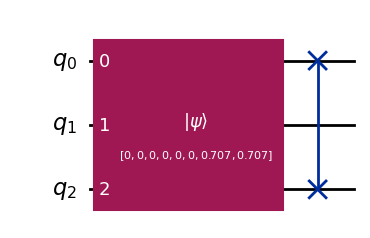

In [65]:
from qiskit import *
from math import pi
import numpy as np

qc= QuantumCircuit(3,0) #(Q,C) Q: number of qubits / C: number of classic bits
#initial state
initialstate= [0,0,0,0,0,0,1,1] #putting the amplitude of the basis gates: |000⟩=0 , |001⟩=0 , |010⟩=0 , |011⟩=0 , |100⟩=0 , |101⟩=0 , |110⟩=1 , |111⟩=1 
norm=np.linalg.norm(initialstate) #normalizating the initialstate
vector= initialstate/norm
qc.initialize(vector)


qc.swap(0,2) # swap gate 


qc.draw('mpl') 


### Bloch Sphere

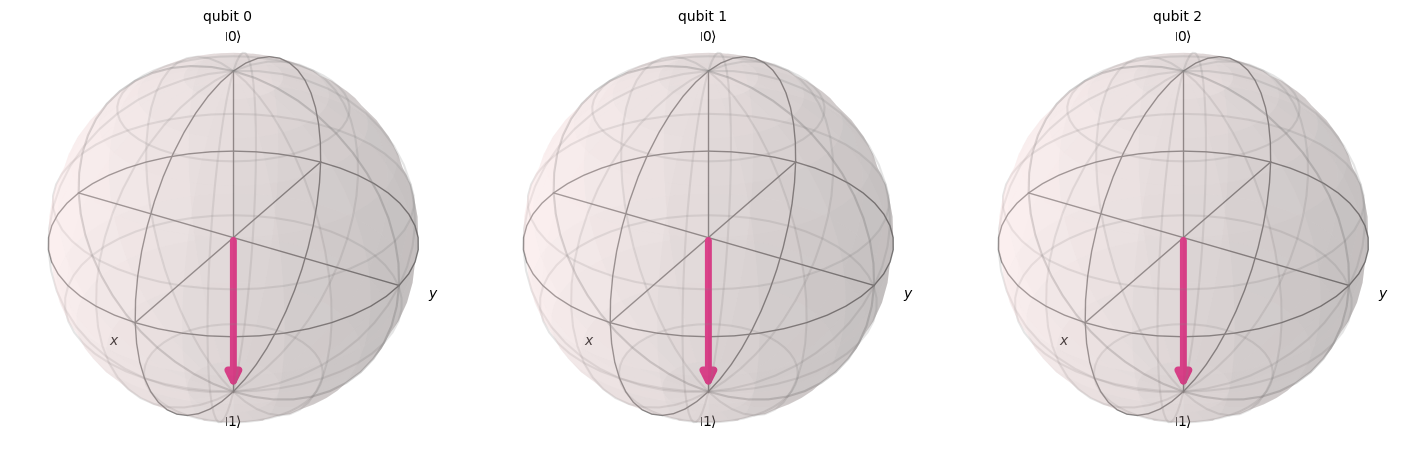

In [52]:
from qiskit_aer import Aer

# we use statevector_simulator to see the wavefunction (exact quantum state) but we use AerSimulator() to simulate real measurements and results like from an actual quantum computer.

#running the circuit (exact quantum states)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc) 
result = job.result()


#statevectorS
statevector = result.get_statevector() #gives what basisvecor* amplitude are in the result
counts = result.get_counts() #the result is always backward of the circuits e.g. 01 = 0 for 2nd qubit & 1 for 1st qubit

#the statevector feature is needed to illustrate the vectors on a bloch sphere
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)



## Z Toffoli gate

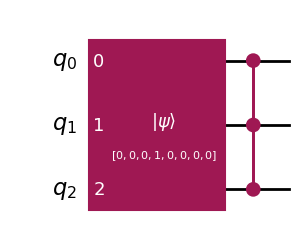

In [53]:
from qiskit import *
from math import pi
import numpy as np

qc= QuantumCircuit(3,0) #(Q,C) Q: number of qubits / C: number of classic bits
#initial state
initialstate= [0,0,0,1,0,0,0,0] #putting the amplitude of the basis gates: |000⟩=0 , |001⟩=0 , |010⟩=0 , |011⟩=1 , |100⟩=0 , |101⟩=0 , |110⟩=0 , |111⟩=0
norm=np.linalg.norm(initialstate) #normalizating the initialstate
vector= initialstate/norm
qc.initialize(vector)

qc.ccz(0,1,2) # Z Toffoli gate

qc.draw('mpl') 


### Bloch Sphere

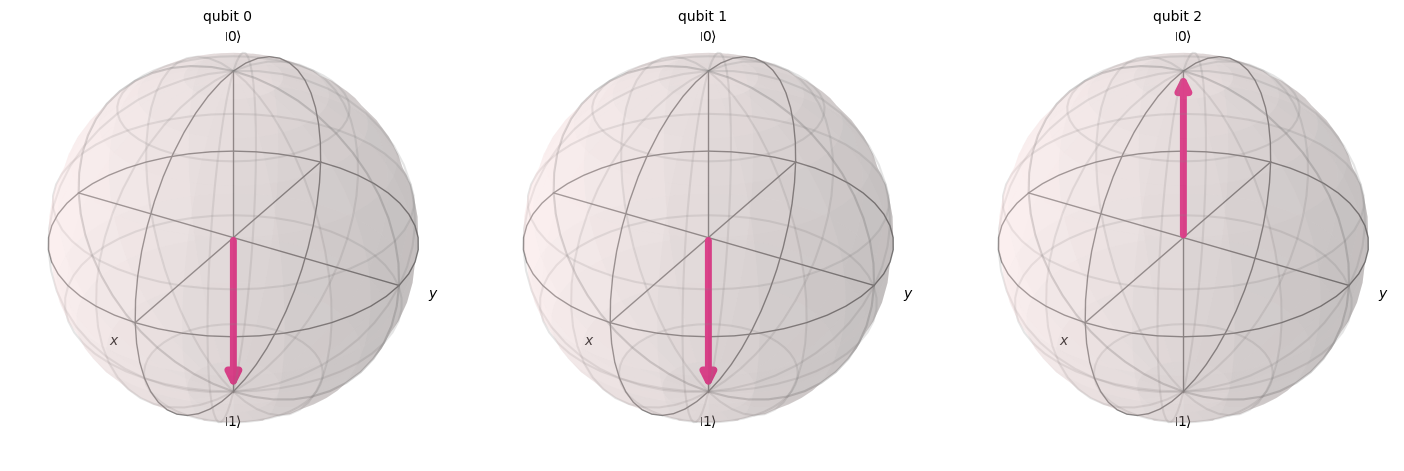

In [54]:
from qiskit_aer import Aer

# we use statevector_simulator to see the wavefunction (exact quantum state) but we use AerSimulator() to simulate real measurements and results like from an actual quantum computer.

#running the circuit (exact quantum states)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc) 
result = job.result()


#statevectorS
statevector = result.get_statevector() #gives what basisvecor* amplitude are in the result
counts = result.get_counts() #the result is always backward of the circuits e.g. 01 = 0 for 2nd qubit & 1 for 1st qubit

#the statevector feature is needed to illustrate the vectors on a bloch sphere
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# as you can see phase shift is not seenable on Bloch Sphere

## Toffoli Gate from standard gate(for real computers)

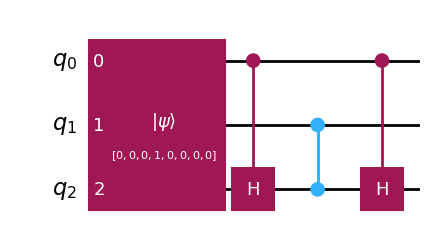

In [58]:
from qiskit import *
from math import pi
import numpy as np

qc= QuantumCircuit(3,0) #(Q,C) Q: number of qubits / C: number of classic bits
#initial state
initialstate= [0,0,0,1,0,0,0,0] #putting the amplitude of the basis gates: |000⟩=0 , |001⟩=0 , |010⟩=0 , |011⟩=1 , |100⟩=0 , |101⟩=0 , |110⟩=0 , |111⟩=0
norm=np.linalg.norm(initialstate) #normalizating the initialstate
vector= initialstate/norm
qc.initialize(vector)
q0=0
q1=1
q2=2

qc.ch(q0,q2)
qc.cz(q1,q2)
qc.ch(q0,q2) 

qc.draw('mpl') 


### Histogram

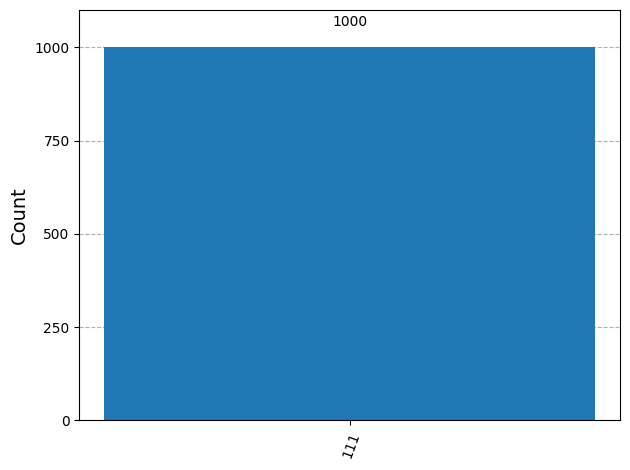

In [57]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
# we use statevector_simulator to see the wavefunction (exact quantum state) but we use AerSimulator() to simulate real measurements and results like from an actual quantum computer.

#running the circuit (exact quantum states)
simulator = AerSimulator()
compiled= transpile(qc,simulator)
compiled.measure_all()
result=simulator.run(compiled,shots=1000).result()
counts= result.get_counts()
plot_histogram(counts)

# as we can see |110> became |111>